In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [2]:
dirname = os.path.join(os.getcwd(),r'D:\tec\9no Semestre\IA\Proyectos finales\CNN')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  D:\tec\9no Semestre\IA\Proyectos finales\CNN\
D:\tec\9no Semestre\IA\Proyectos finales\CNN\asaltos 1
D:\tec\9no Semestre\IA\Proyectos finales\CNN\incendios 39116
D:\tec\9no Semestre\IA\Proyectos finales\CNN\inundaciones 12689
D:\tec\9no Semestre\IA\Proyectos finales\CNN\robocasahabitacion 20210
D:\tec\9no Semestre\IA\Proyectos finales\CNN\tornado 23677
Directorios leidos: 5
Imagenes en cada directorio [39117, 12689, 20210, 23677, 26776]
suma Total de imagenes en subdirs: 122469


In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  122469


In [4]:
desastres=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    desastres.append(name[len(name)-1])
    indice=indice+1

0 asaltos
1 incendios
2 inundaciones
3 robocasahabitacion
4 tornado


In [5]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) 




classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (97975, 30, 30, 3) (97975,)
Testing data shape :  (24494, 30, 30, 3) (24494,)


Text(0.5, 1.0, 'Ground Truth : 3')

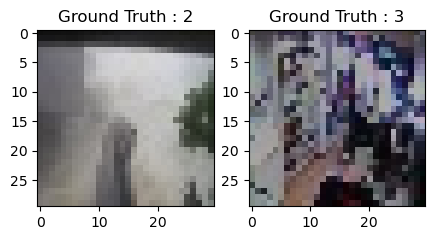

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

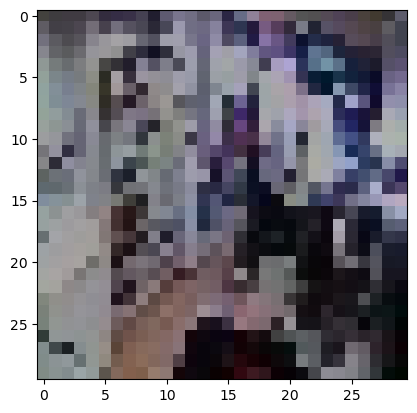

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


In [10]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [11]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(78380, 30, 30, 3) (19595, 30, 30, 3) (78380, 5) (19595, 5)


In [12]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [13]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(30,30,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

d:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [14]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,493 (904.27 KB)

 Trainable params: 231,493 (904.27 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
TF_USE_LEGACY_KERAS=True

INIT_LR = 0.01

# Create an optimizer with a learning rate schedule
optimizer = keras.optimizers.SGD(learning_rate=keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=100,
    decay_rate=0.96,  # Decay rate can be adjusted
    staircase=True
))

# Compile the model
sport_model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)

In [16]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.5764 - loss: 1.0864 - val_accuracy: 0.8991 - val_loss: 0.3734
Epoch 2/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8431 - loss: 0.4665 - val_accuracy: 0.9389 - val_loss: 0.2425
Epoch 3/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8870 - loss: 0.3607 - val_accuracy: 0.9512 - val_loss: 0.1935
Epoch 4/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9032 - loss: 0.3128 - val_accuracy: 0.9566 - val_loss: 0.1726
Epoch 5/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9104 - loss: 0.2920 - val_accuracy: 0.9590 - val_loss: 0.1628
Epoch 6/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9138 - loss: 0.2826 - val_accuracy: 0.9601 - val_loss: 0.1573
Epoch 7/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9150 - loss: 0.2773 - val_accuracy: 0.9603 - val_loss: 0.1546
Epoch 8/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9192 -

In [17]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.export(r"D:\tec\9no Semestre\IA\Proyectos finales\CNN\model")

INFO:tensorflow:Assets written to: D:\tec\9no Semestre\IA\Proyectos finales\CNN\model\assets


INFO:tensorflow:Assets written to: D:\tec\9no Semestre\IA\Proyectos finales\CNN\model\assets


Saved artifact at 'D:\tec\9no Semestre\IA\Proyectos finales\CNN\model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2129325427168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2129325428224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2129325429808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2129325430864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2129325430512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2129325429984: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [18]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.1546


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.15440680086612701
Test accuracy: 0.9617457389831543


In [20]:
sport_train.history

{'accuracy': [0.7020158171653748,
  0.8578208684921265,
  0.8918091058731079,
  0.9054605960845947,
  0.9113549590110779,
  0.9142128229141235,
  0.9170706868171692,
  0.9180530905723572,
  0.9183975458145142,
  0.91843581199646,
  0.919749915599823,
  0.9191247820854187,
  0.9188951253890991,
  0.9188696146011353,
  0.9184740781784058,
  0.91926509141922,
  0.919890284538269,
  0.9194437265396118,
  0.9205664992332458,
  0.9191630482673645],
 'loss': [0.8125774264335632,
  0.43152743577957153,
  0.3467903435230255,
  0.30704501271247864,
  0.28834372758865356,
  0.2804371118545532,
  0.27411243319511414,
  0.2713950276374817,
  0.2692609429359436,
  0.2656896114349365,
  0.26603052020072937,
  0.2663351893424988,
  0.2686293423175812,
  0.2675294876098633,
  0.2687136232852936,
  0.2684909403324127,
  0.26336124539375305,
  0.2655460238456726,
  0.2651194632053375,
  0.2674493193626404],
 'val_accuracy': [0.8990558981895447,
  0.9388619661331177,
  0.9511610269546509,
  0.956621587276

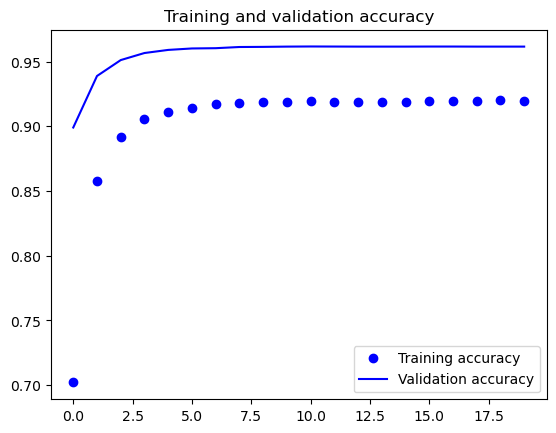

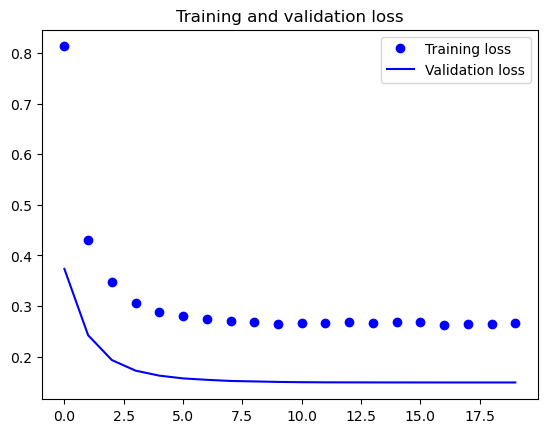

In [21]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predicted_classes2 = sport_model.predict(test_X)

766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [23]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [24]:
predicted_classes.shape, test_Y.shape

((24494,), (24494,))

Found 23557 correct labels


C:\Users\sam_o\AppData\Local\Temp\ipykernel_19520\2799704399.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sam_o\AppData\Local\Temp\ipykernel_19520\2799704399.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


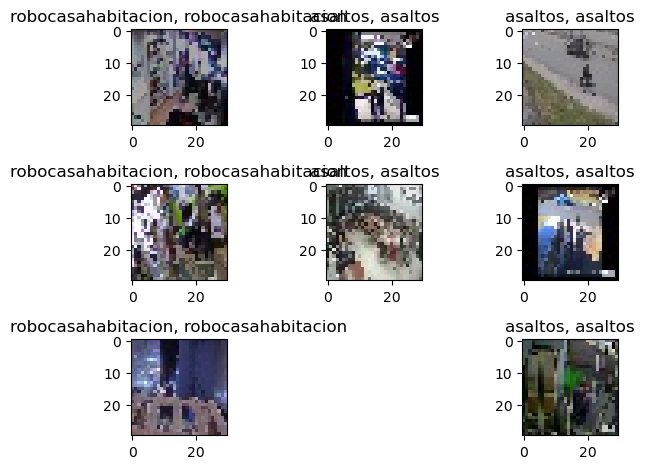

In [25]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(desastres[predicted_classes[correct]],
                                                    desastres[test_Y[correct]]))

    plt.tight_layout()

Found 937 incorrect labels


C:\Users\sam_o\AppData\Local\Temp\ipykernel_19520\1238918720.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sam_o\AppData\Local\Temp\ipykernel_19520\1238918720.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


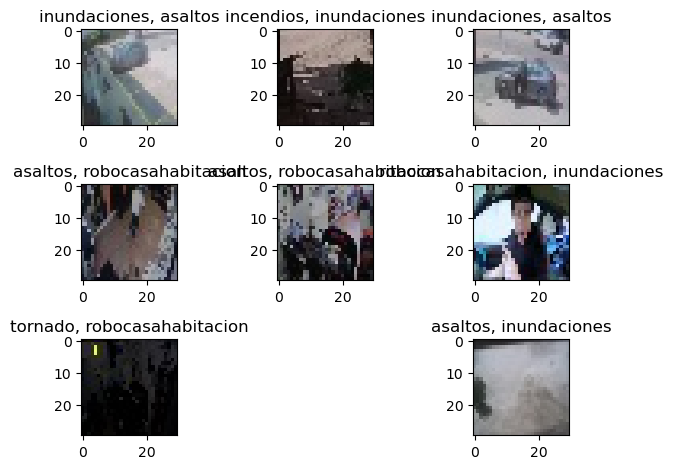

In [26]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(desastres[predicted_classes[incorrect]],
                                                    desastres[test_Y[incorrect]]))
    plt.tight_layout()

In [27]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97      7829
     Class 1       0.95      0.98      0.96      2500
     Class 2       0.94      0.89      0.91      4108
     Class 3       0.97      0.96      0.96      4787
     Class 4       0.98      0.99      0.98      5270

    accuracy                           0.96     24494
   macro avg       0.96      0.96      0.96     24494
weighted avg       0.96      0.96      0.96     24494

